# Contents<a id='back'></a>

* [Introduction](#intro)
* [Step 1. Data overview](#overview)
* [Step 2. EDA](#eda)
    * [2.1 Split source data](#split)
* [Stage 3. Investigate the quality of different models](#invest)
    * [3.1 Decision Tree Classifier](#dtc)
    * [3.2 Random Tree Classifier](#rtc)
* [Conclusion](#end)

# Introduction<a id='intro'></a>

Mobile carrier Megaline has found out that many of their subscribers use legacy plans. They want to develop a model that would analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra.

Develop a model with the highest possible accuracy. In this project, the threshold for accuracy is 0.75. Check the accuracy using the test dataset.

**Goal:**

1. Split the source data into a training set, a validation set, and a test set.
2. Investigate the quality of different models by changing hyperparameters. Briefly describe the findings of the study.
3. Check the quality of the model using the test set.
4. Additional task: sanity check the model.  

## Step 1.Data overview<a id='overview'></a>

In [17]:
# Loading libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
# Read data

df = pd.read_csv("users_behavior.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [3]:
df.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

**Observation**

The data set seems clean and does not contain any missing values.

## Step 2. EDA<a id='eda'></a>

In [16]:
# Check corelation

df.corr()

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


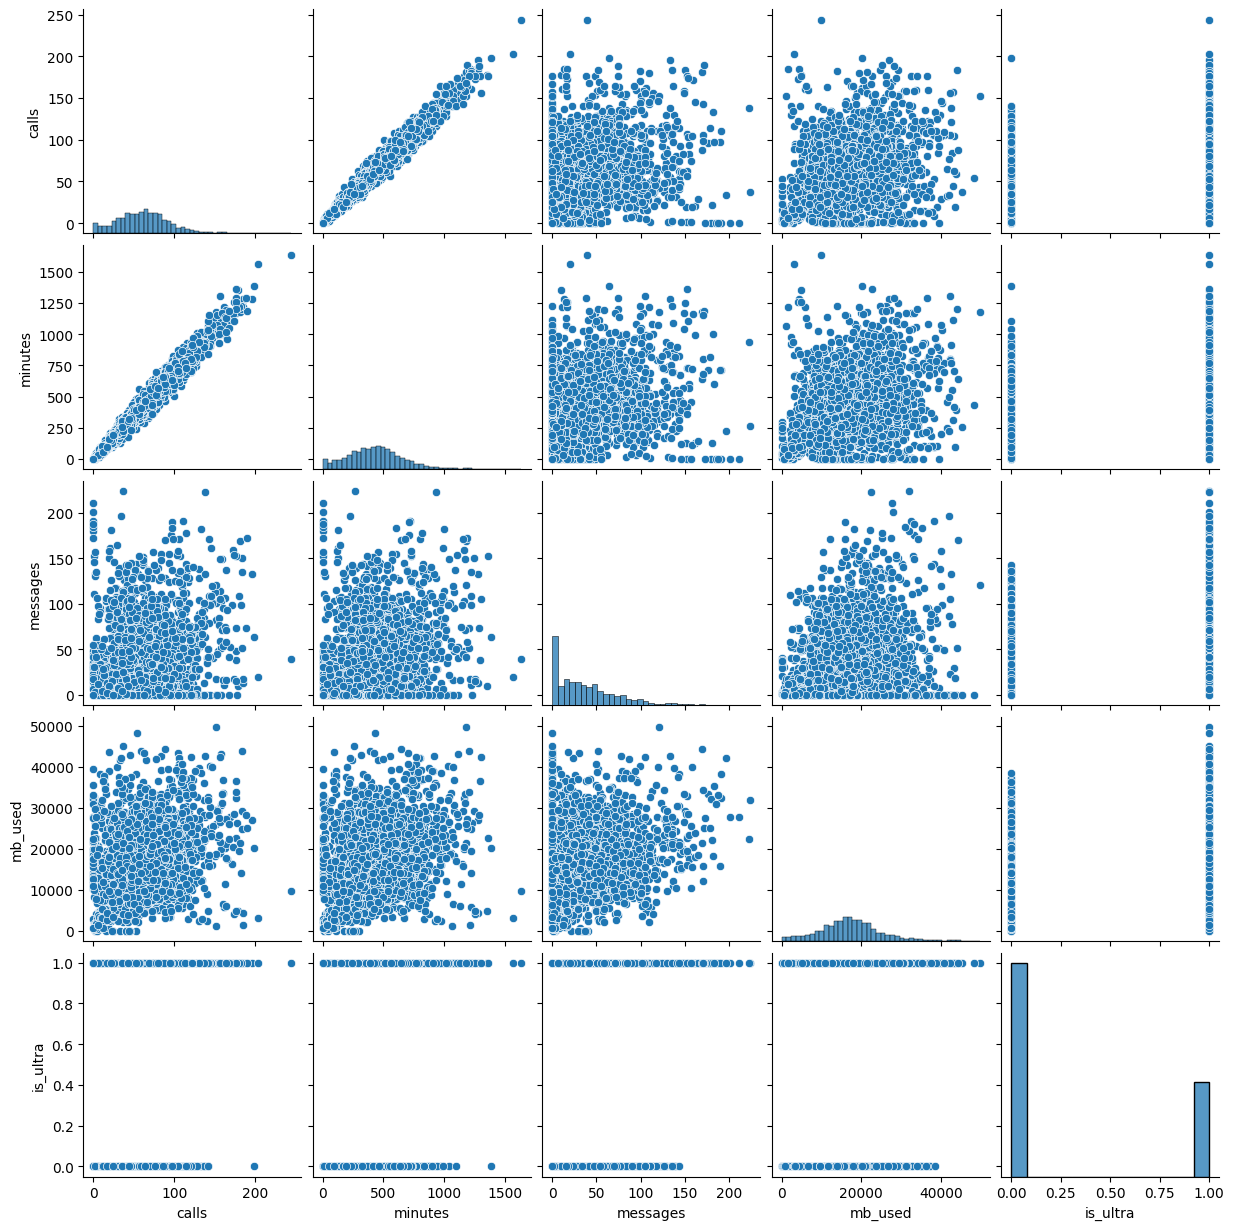

In [18]:
# Plot pairplot to view the relationship

sns.pairplot(df)

### Split the source data into a training set, a validation set, and a test set.<a id='split'></a>

In [5]:
X = df[['calls', 'minutes', 'messages', 'mb_used']]
y = df[['is_ultra']]

In [6]:
# Training, validation & test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(2313, 4)
(2313, 1)
(322, 4)
(322, 1)
(579, 4)
(579, 1)


## Step 3. Investigate the quality of different models<a id='invest'></a>

Investigate the quality of different models by changing hyperparameters. Describe the findings.

### Decision Tree Classifier<a id='dtc'></a>

In [8]:
from sklearn.tree import DecisionTreeClassifier 

In [9]:
depths = [None, 1, 2, 3, 4, 5]
samples_split = [2,3,4,5,6]
samples_leaf = [1,2,3,4,5]

best_accuracy = {"depth":0, "split":0, "leaf":0, "accuracy":0}
for i in depths:
    for j in samples_split:
        for k in samples_leaf:
            # create a regressor object 
            dt_classifier = DecisionTreeClassifier(max_depth=i, min_samples_split=j, min_samples_leaf=k)
            dt_classifier.fit(X_train, y_train)
            print(f"Max Depth-{i}, Samples Split-{j}, Samples Leaf-{k}:" ,dt_classifier.score(X_test, y_test))
            
            if best_accuracy['accuracy'] < dt_classifier.score(X_test, y_test):
                best_accuracy['depth'] = i
                best_accuracy['split'] = j
                best_accuracy['leaf'] = k
                best_accuracy['accuracy'] = dt_classifier.score(X_test, y_test)

Max Depth-None, Samples Split-2, Samples Leaf-1: 0.7142857142857143
Max Depth-None, Samples Split-2, Samples Leaf-2: 0.7608695652173914
Max Depth-None, Samples Split-2, Samples Leaf-3: 0.7298136645962733
Max Depth-None, Samples Split-2, Samples Leaf-4: 0.7608695652173914
Max Depth-None, Samples Split-2, Samples Leaf-5: 0.7453416149068323
Max Depth-None, Samples Split-3, Samples Leaf-1: 0.7111801242236024
Max Depth-None, Samples Split-3, Samples Leaf-2: 0.7391304347826086
Max Depth-None, Samples Split-3, Samples Leaf-3: 0.7453416149068323
Max Depth-None, Samples Split-3, Samples Leaf-4: 0.7577639751552795
Max Depth-None, Samples Split-3, Samples Leaf-5: 0.7515527950310559
Max Depth-None, Samples Split-4, Samples Leaf-1: 0.7236024844720497
Max Depth-None, Samples Split-4, Samples Leaf-2: 0.7391304347826086
Max Depth-None, Samples Split-4, Samples Leaf-3: 0.7360248447204969
Max Depth-None, Samples Split-4, Samples Leaf-4: 0.7639751552795031
Max Depth-None, Samples Split-4, Samples Leaf-5:

Max Depth-5, Samples Split-2, Samples Leaf-5: 0.7763975155279503
Max Depth-5, Samples Split-3, Samples Leaf-1: 0.7639751552795031
Max Depth-5, Samples Split-3, Samples Leaf-2: 0.7701863354037267
Max Depth-5, Samples Split-3, Samples Leaf-3: 0.7763975155279503
Max Depth-5, Samples Split-3, Samples Leaf-4: 0.7732919254658385
Max Depth-5, Samples Split-3, Samples Leaf-5: 0.7763975155279503
Max Depth-5, Samples Split-4, Samples Leaf-1: 0.7701863354037267
Max Depth-5, Samples Split-4, Samples Leaf-2: 0.7701863354037267
Max Depth-5, Samples Split-4, Samples Leaf-3: 0.7763975155279503
Max Depth-5, Samples Split-4, Samples Leaf-4: 0.7732919254658385
Max Depth-5, Samples Split-4, Samples Leaf-5: 0.7763975155279503
Max Depth-5, Samples Split-5, Samples Leaf-1: 0.7639751552795031
Max Depth-5, Samples Split-5, Samples Leaf-2: 0.7701863354037267
Max Depth-5, Samples Split-5, Samples Leaf-3: 0.7732919254658385
Max Depth-5, Samples Split-5, Samples Leaf-4: 0.7763975155279503
Max Depth-5, Samples Spli

In [10]:
best_accuracy

{'depth': 3, 'split': 2, 'leaf': 1, 'accuracy': 0.7795031055900621}

In [11]:
# Use the Validation set to evaluate the accuracy

dt_classifier = DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=1)
dt_classifier.fit(X_train, y_train)
print(f"Max Depth-{3}, Samples Slit-{2}, Samples Leaf-{1}:" ,dt_classifier.score(X_val, y_val))

Max Depth-3, Samples Slit-2, Samples Leaf-1: 0.7737478411053541


**Findings**

The Decision Tree Classifier has a `Max Depth-3`, `Samples Slit-2`, `Samples Leaf-1`. The accuracy of this model, as measured by the R² score, is approximately 0.77. This accuracy is within the threshold of 0.75.

### Random Tree Classifier<a id='rtc'></a>

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
depths = [None, 1, 2, 3, 4, 5]
samples_split = [2,3,4,5,6]
samples_leaf = [1,2,3,4,5]

best_accuracy = {"depth":0, "split":0, "leaf":0, "accuracy":0}
for i in depths:
    for j in samples_split:
        for k in samples_leaf:
            # create a regressor object 
            dt_classifier = RandomForestClassifier(max_depth=i, min_samples_split=j, min_samples_leaf=k)
            dt_classifier.fit(X_train, y_train)
            print(f"Max Depth-{i}, Samples Split-{j}, Samples Leaf-{k}:" ,dt_classifier.score(X_test, y_test))
            
            if best_accuracy['accuracy'] < dt_classifier.score(X_test, y_test):
                best_accuracy['depth'] = i
                best_accuracy['split'] = j
                best_accuracy['leaf'] = k
                best_accuracy['accuracy'] = dt_classifier.score(X_test, y_test)

/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-2, Samples Leaf-1: 0.8074534161490683


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-2, Samples Leaf-2: 0.8229813664596274


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-2, Samples Leaf-3: 0.8198757763975155


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-2, Samples Leaf-4: 0.8105590062111802


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-2, Samples Leaf-5: 0.8043478260869565


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-3, Samples Leaf-1: 0.8167701863354038


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-3, Samples Leaf-2: 0.8198757763975155


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-3, Samples Leaf-3: 0.8136645962732919


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-3, Samples Leaf-4: 0.8074534161490683


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-3, Samples Leaf-5: 0.8105590062111802


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-4, Samples Leaf-1: 0.8260869565217391


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-4, Samples Leaf-2: 0.8136645962732919


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-4, Samples Leaf-3: 0.8260869565217391


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-4, Samples Leaf-4: 0.8229813664596274


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-4, Samples Leaf-5: 0.8043478260869565


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-5, Samples Leaf-1: 0.8074534161490683


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-5, Samples Leaf-2: 0.8229813664596274


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-5, Samples Leaf-3: 0.8198757763975155


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-5, Samples Leaf-4: 0.8136645962732919


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-5, Samples Leaf-5: 0.8043478260869565


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-6, Samples Leaf-1: 0.8291925465838509


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-6, Samples Leaf-2: 0.8136645962732919


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-6, Samples Leaf-3: 0.7981366459627329


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-6, Samples Leaf-4: 0.8167701863354038


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-None, Samples Split-6, Samples Leaf-5: 0.8105590062111802


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-2, Samples Leaf-1: 0.7546583850931677


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-2, Samples Leaf-2: 0.7670807453416149


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-2, Samples Leaf-3: 0.7639751552795031


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-2, Samples Leaf-4: 0.7670807453416149


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-2, Samples Leaf-5: 0.7546583850931677


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-3, Samples Leaf-1: 0.7670807453416149


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-3, Samples Leaf-2: 0.7453416149068323


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-3, Samples Leaf-3: 0.7670807453416149


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-3, Samples Leaf-4: 0.7142857142857143


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-3, Samples Leaf-5: 0.7577639751552795


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-4, Samples Leaf-1: 0.7484472049689441


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-4, Samples Leaf-2: 0.7422360248447205


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-4, Samples Leaf-3: 0.7670807453416149


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-4, Samples Leaf-4: 0.7670807453416149


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-4, Samples Leaf-5: 0.7639751552795031


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-5, Samples Leaf-1: 0.7670807453416149


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-5, Samples Leaf-2: 0.7422360248447205


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-5, Samples Leaf-3: 0.7546583850931677


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-5, Samples Leaf-4: 0.7577639751552795


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-5, Samples Leaf-5: 0.7422360248447205


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-6, Samples Leaf-1: 0.7670807453416149


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-6, Samples Leaf-2: 0.7546583850931677


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-6, Samples Leaf-3: 0.7422360248447205


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-6, Samples Leaf-4: 0.7546583850931677


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-1, Samples Split-6, Samples Leaf-5: 0.7453416149068323


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-2, Samples Leaf-1: 0.7670807453416149


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-2, Samples Leaf-2: 0.7670807453416149


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-2, Samples Leaf-3: 0.7701863354037267


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-2, Samples Leaf-4: 0.7701863354037267


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-2, Samples Leaf-5: 0.7670807453416149


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-3, Samples Leaf-1: 0.7670807453416149


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-3, Samples Leaf-2: 0.7701863354037267


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-3, Samples Leaf-3: 0.7701863354037267


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-3, Samples Leaf-4: 0.7670807453416149


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-3, Samples Leaf-5: 0.7701863354037267


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-4, Samples Leaf-1: 0.7670807453416149


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-4, Samples Leaf-2: 0.7670807453416149


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-4, Samples Leaf-3: 0.7701863354037267


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-4, Samples Leaf-4: 0.7732919254658385


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-4, Samples Leaf-5: 0.7701863354037267


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-5, Samples Leaf-1: 0.7701863354037267


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-5, Samples Leaf-2: 0.7701863354037267


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-5, Samples Leaf-3: 0.7639751552795031


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-5, Samples Leaf-4: 0.7701863354037267


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-5, Samples Leaf-5: 0.7670807453416149


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-6, Samples Leaf-1: 0.7701863354037267


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-6, Samples Leaf-2: 0.7670807453416149


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-6, Samples Leaf-3: 0.7670807453416149


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-6, Samples Leaf-4: 0.7670807453416149


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-2, Samples Split-6, Samples Leaf-5: 0.7701863354037267


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-2, Samples Leaf-1: 0.7763975155279503


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-2, Samples Leaf-2: 0.7763975155279503


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-2, Samples Leaf-3: 0.7763975155279503


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-2, Samples Leaf-4: 0.7701863354037267


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-2, Samples Leaf-5: 0.7701863354037267


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-3, Samples Leaf-1: 0.7701863354037267


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-3, Samples Leaf-2: 0.7701863354037267


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-3, Samples Leaf-3: 0.7732919254658385


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-3, Samples Leaf-4: 0.7763975155279503


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-3, Samples Leaf-5: 0.7701863354037267


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-4, Samples Leaf-1: 0.7763975155279503


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-4, Samples Leaf-2: 0.7732919254658385


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-4, Samples Leaf-3: 0.7763975155279503


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-4, Samples Leaf-4: 0.7795031055900621


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-4, Samples Leaf-5: 0.7701863354037267


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-5, Samples Leaf-1: 0.7732919254658385


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-5, Samples Leaf-2: 0.7763975155279503


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-5, Samples Leaf-3: 0.7701863354037267


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-5, Samples Leaf-4: 0.7763975155279503


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-5, Samples Leaf-5: 0.7763975155279503


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-6, Samples Leaf-1: 0.7763975155279503


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-6, Samples Leaf-2: 0.7763975155279503


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-6, Samples Leaf-3: 0.7795031055900621


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-6, Samples Leaf-4: 0.7701863354037267


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-3, Samples Split-6, Samples Leaf-5: 0.7701863354037267


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-2, Samples Leaf-1: 0.7763975155279503


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-2, Samples Leaf-2: 0.7795031055900621


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-2, Samples Leaf-3: 0.782608695652174


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-2, Samples Leaf-4: 0.7795031055900621


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-2, Samples Leaf-5: 0.782608695652174


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-3, Samples Leaf-1: 0.782608695652174


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-3, Samples Leaf-2: 0.782608695652174


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-3, Samples Leaf-3: 0.782608695652174


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-3, Samples Leaf-4: 0.782608695652174


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-3, Samples Leaf-5: 0.7795031055900621


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-4, Samples Leaf-1: 0.7795031055900621


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-4, Samples Leaf-2: 0.7857142857142857


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-4, Samples Leaf-3: 0.782608695652174


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-4, Samples Leaf-4: 0.7795031055900621


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-4, Samples Leaf-5: 0.7795031055900621


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-5, Samples Leaf-1: 0.7795031055900621


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-5, Samples Leaf-2: 0.782608695652174


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-5, Samples Leaf-3: 0.7763975155279503


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-5, Samples Leaf-4: 0.7795031055900621


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-5, Samples Leaf-5: 0.7795031055900621


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-6, Samples Leaf-1: 0.7795031055900621


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-6, Samples Leaf-2: 0.7795031055900621


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-6, Samples Leaf-3: 0.7795031055900621


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-6, Samples Leaf-4: 0.7795031055900621


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-4, Samples Split-6, Samples Leaf-5: 0.7795031055900621


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-2, Samples Leaf-1: 0.7857142857142857


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-2, Samples Leaf-2: 0.7919254658385093


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-2, Samples Leaf-3: 0.7857142857142857


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-2, Samples Leaf-4: 0.782608695652174


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-2, Samples Leaf-5: 0.7919254658385093


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-3, Samples Leaf-1: 0.7919254658385093


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-3, Samples Leaf-2: 0.7857142857142857


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-3, Samples Leaf-3: 0.7888198757763976


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-3, Samples Leaf-4: 0.782608695652174


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-3, Samples Leaf-5: 0.7919254658385093


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-4, Samples Leaf-1: 0.782608695652174


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-4, Samples Leaf-2: 0.7919254658385093


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-4, Samples Leaf-3: 0.7888198757763976


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-4, Samples Leaf-4: 0.7888198757763976


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-4, Samples Leaf-5: 0.7888198757763976


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-5, Samples Leaf-1: 0.7857142857142857


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-5, Samples Leaf-2: 0.7795031055900621


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-5, Samples Leaf-3: 0.7857142857142857


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-5, Samples Leaf-4: 0.7888198757763976


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-5, Samples Leaf-5: 0.7857142857142857


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-6, Samples Leaf-1: 0.7919254658385093


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-6, Samples Leaf-2: 0.7888198757763976


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-6, Samples Leaf-3: 0.782608695652174


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-6, Samples Leaf-4: 0.7857142857142857


/tmp/ipykernel_535/610545005.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-5, Samples Split-6, Samples Leaf-5: 0.782608695652174


In [14]:
best_accuracy

{'depth': None, 'split': 6, 'leaf': 1, 'accuracy': 0.8291925465838509}

In [15]:
# Use the Validation set to evaluate the accuracy

dt_classifier = RandomForestClassifier(max_depth=None, min_samples_split=3, min_samples_leaf=2)
dt_classifier.fit(X_train, y_train)
print(f"Max Depth-{None}, Samples Slit-{3}, Samples Leaf-{2}:" ,dt_classifier.score(X_val, y_val))

/tmp/ipykernel_535/1310656180.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_classifier.fit(X_train, y_train)


Max Depth-None, Samples Slit-3, Samples Leaf-2: 0.7979274611398963


**Findings**

The Random Tree Classifier has a `Max Depth-None`, `Samples Slit-3`, `Samples Leaf-2`. The accuracy of this model, as measured by the R² score, is approximately 0.8. This accuracy is within the threshold of 0.75.

# Conclusion<a id='end'></a>

The Random Tree Classifier has the highest accuracy of 0.8 compared to Decision Tree Classifier. The best parameters for Random Tree Classifier is `Max Depth-None`, `Samples Slit-3`, `Samples Leaf-2`.